<a href="https://colab.research.google.com/github/BankNatchapol/CPE463-Image-Processing/blob/main/CPE463_spatial_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

from skimage import io
import pandas as pd

Original : (400, 290)


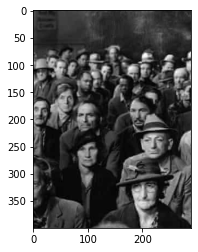

In [2]:
image = io.imread('https://i.guim.co.uk/img/media/1e7d86930c1637eff8229b63c59cd29210606906/0_0_3879_3102/master/3879.jpg?width=445&quality=45&auto=format&fit=max&dpr=2&s=d88032e2aa1e6b1ed3cb5259e3d3fb60', as_gray=True)[100:500, 600:] *255

print("Original :", image.shape)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.show()

# **Spatial filtering**
Cross-correlation and convolution are both operations applied to images. Cross-correlation means sliding a kernel (filter) across an image. Convolution means sliding a flipped kernel across an image.

Using cross-correlation for template matching.

template : (60, 60)


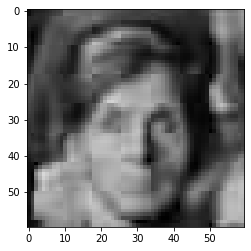

In [3]:
template = image[130:190, 30:90]
print("template :", template.shape)
plt.imshow(template, cmap="gray", vmin=0, vmax=255)
plt.show()

In [4]:
from scipy.signal import correlate2d
cr = correlate2d(image, template, mode="same", boundary='symm')
cr_norm = (cr-cr.mean())/(cr.std())

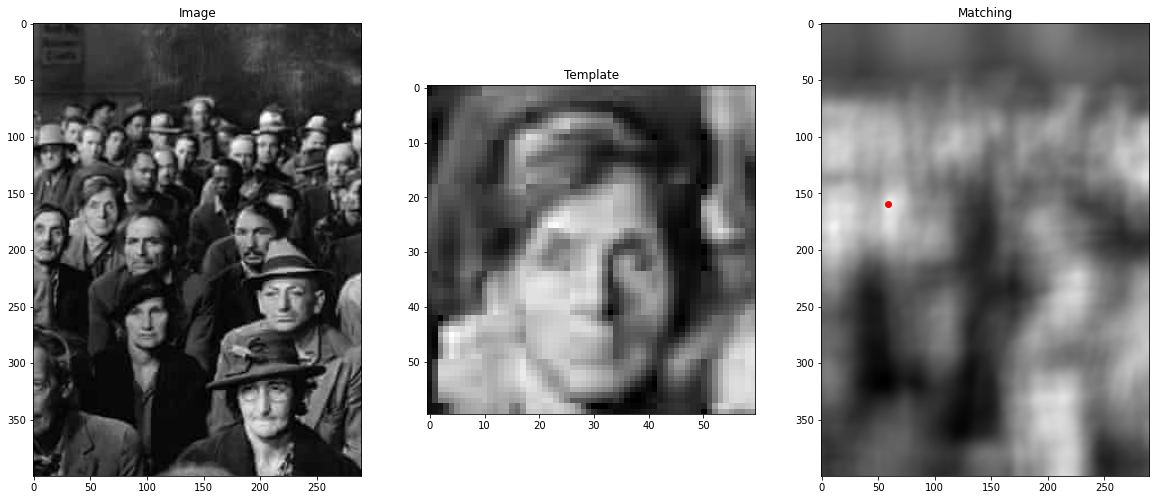

In [5]:
y, x = np.unravel_index(np.argmax(cr_norm), cr_norm.shape)
names = ["Image", "Template", "Matching"]
matched_images = [image, template, cr_norm]

fig, axs = plt.subplots(1, len(names), figsize = (20, 20))

for i in range(len(matched_images)):
  axs[i].imshow(matched_images[i], cmap="gray")
  axs[i].title.set_text(names[i])

plt.plot(x, y, 'ro')
plt.show()

Using convolution to perform low-pass filtering with gaussian kernel.

Original : (512, 512)


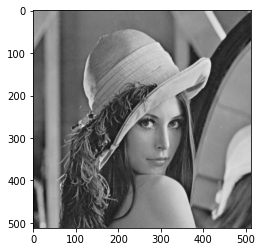

In [35]:
image = io.imread('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png', as_gray=True) *255

print("Original :", image.shape)
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.show()

In [43]:
def addMinMax(image, noise):
  # check if value after add more than 255
    noisy_image = image + noise

    checkmax = lambda x: 255.0 if x>255.0 else x
    checkmin = lambda x: 0 if x<0 else x
    f1 = np.vectorize(checkmax)
    f2 = np.vectorize(checkmin)
    return f2(f1(noisy_image))

noise = np.random.normal(0, 0.1, image.shape)*255
noisy_image = addMinMax(image, noise)

In [44]:
frac0, frac1 = 1, 16
plot_kernel = np.array([[1,2,1], 
                        [2,4,2],
                        [1,2,1]])
kernel = (frac0/frac1)*plot_kernel
conv_kernel = np.flip(np.flip(kernel, 0), 1)

In [45]:
#@title Display kernel
from IPython.display import display, Markdown, Latex
if frac0/frac1 == 1:
  x = f"""Kernel = \\begin{{array}}{{|c|c|c|}}\\hline
          {plot_kernel[0][0]} & {plot_kernel[0][1]} & {plot_kernel[0][2]}  \\\\ \\hline
          {plot_kernel[1][0]} & {plot_kernel[1][1]} & {plot_kernel[1][2]}  \\\\ \\hline
          {plot_kernel[2][0]} & {plot_kernel[2][1]} & {plot_kernel[2][2]}   \\\\ \\hline
          \\end{{array}}"""
else:
  x = f"""Kernel = \\frac{{{frac0}}}{{{frac1}}}\\begin{{array}}{{|c|c|c|}}\\hline
          {plot_kernel[0][0]} & {plot_kernel[0][1]} & {plot_kernel[0][2]}  \\\\ \\hline
          {plot_kernel[1][0]} & {plot_kernel[1][1]} & {plot_kernel[1][2]}  \\\\ \\hline
          {plot_kernel[2][0]} & {plot_kernel[2][1]} & {plot_kernel[2][2]}   \\\\ \\hline
          \\end{{array}}"""
display(Latex(x))

<IPython.core.display.Latex object>

In [46]:
conv_image = correlate2d(noisy_image, conv_kernel, mode="same")
conv_image_norm = (conv_image-conv_image.mean())/(conv_image.std()) 

names = ["Original", "Noisy image", "Gaussian filtering"]
conv_images = [image, noisy_image, conv_image_norm]

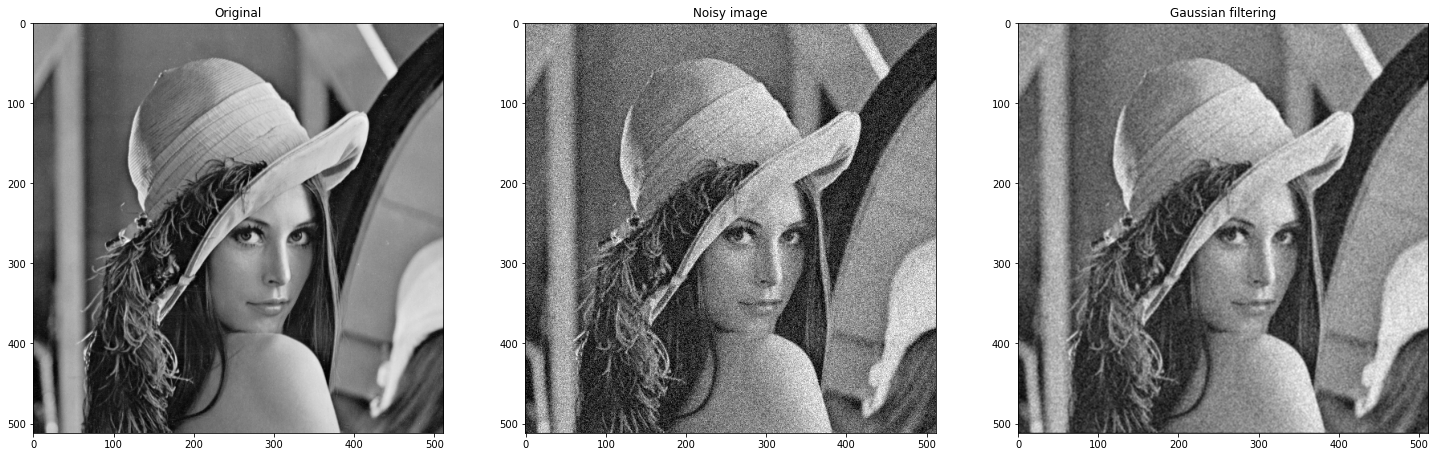

In [48]:
fig, axs = plt.subplots(1, len(names), figsize = (25, 25))

for i in range(len(conv_images)):
  axs[i].imshow(conv_images[i], cmap="gray")
  axs[i].title.set_text(names[i])

plt.show()

Using convolution median kernel to reduce salt and pepper noise.

In [65]:
from scipy.ndimage import median_filter

noise = np.random.choice([-255,0, 0, 0, 0,55], image.shape)
noisy_image = addMinMax(image, noise)

median_image = median_filter(noisy_image, size = 7)
names = ["Original", "Noisy image", "Median filtering"]
median_images = [image, noisy_image, median_image]

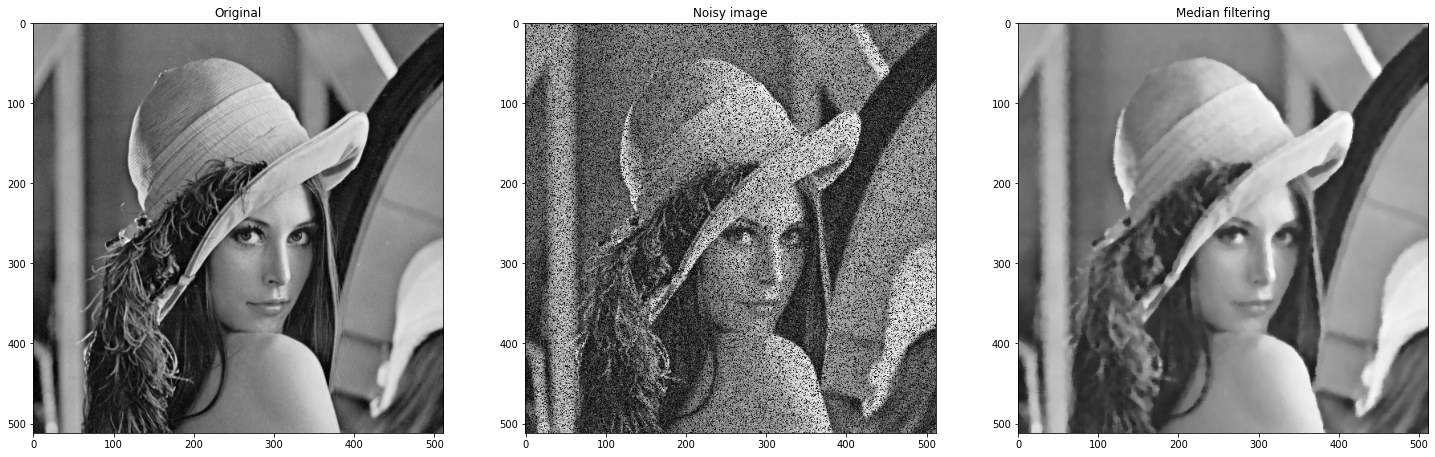

In [66]:
fig, axs = plt.subplots(1, len(names), figsize = (25, 25))

for i in range(len(median_images)):
  axs[i].imshow(median_images[i], cmap="gray")
  axs[i].title.set_text(names[i])

plt.show()

Using convolution with first order derivative to perform edge detection.

In [84]:
frac0, frac1 = 1, 1
plot_kernel = np.array([[-1,0,1], 
                        [-2,0,2],
                        [-1,0,1]])
kernel = (frac0/frac1)*plot_kernel
conv_kernel = np.flip(np.flip(kernel, 0), 1)

In [85]:
#@title Display kernel
from IPython.display import display, Markdown, Latex
if frac0/frac1 == 1:
  x = f"""Kernel = \\begin{{array}}{{|c|c|c|}}\\hline
          {plot_kernel[0][0]} & {plot_kernel[0][1]} & {plot_kernel[0][2]}  \\\\ \\hline
          {plot_kernel[1][0]} & {plot_kernel[1][1]} & {plot_kernel[1][2]}  \\\\ \\hline
          {plot_kernel[2][0]} & {plot_kernel[2][1]} & {plot_kernel[2][2]}   \\\\ \\hline
          \\end{{array}}"""
else:
  x = f"""Kernel = \\frac{{{frac0}}}{{{frac1}}}\\begin{{array}}{{|c|c|c|}}\\hline
          {plot_kernel[0][0]} & {plot_kernel[0][1]} & {plot_kernel[0][2]}  \\\\ \\hline
          {plot_kernel[1][0]} & {plot_kernel[1][1]} & {plot_kernel[1][2]}  \\\\ \\hline
          {plot_kernel[2][0]} & {plot_kernel[2][1]} & {plot_kernel[2][2]}   \\\\ \\hline
          \\end{{array}}"""
display(Latex(x))

<IPython.core.display.Latex object>

In [92]:
conv_image1 = correlate2d(image, conv_kernel.T, mode="same")
conv_image1 = (conv_image1-conv_image1.mean())/(conv_image1.std()) 
conv_image2 = correlate2d(conv_image1, conv_kernel, mode="same")
conv_image2 = (conv_image2-conv_image2.mean())/(conv_image2.std()) 

conv_image_norm = (conv_image1 + conv_image2)/2

names = ["Original", "Sobel filtering"]
conv_images = [image, conv_image_norm]

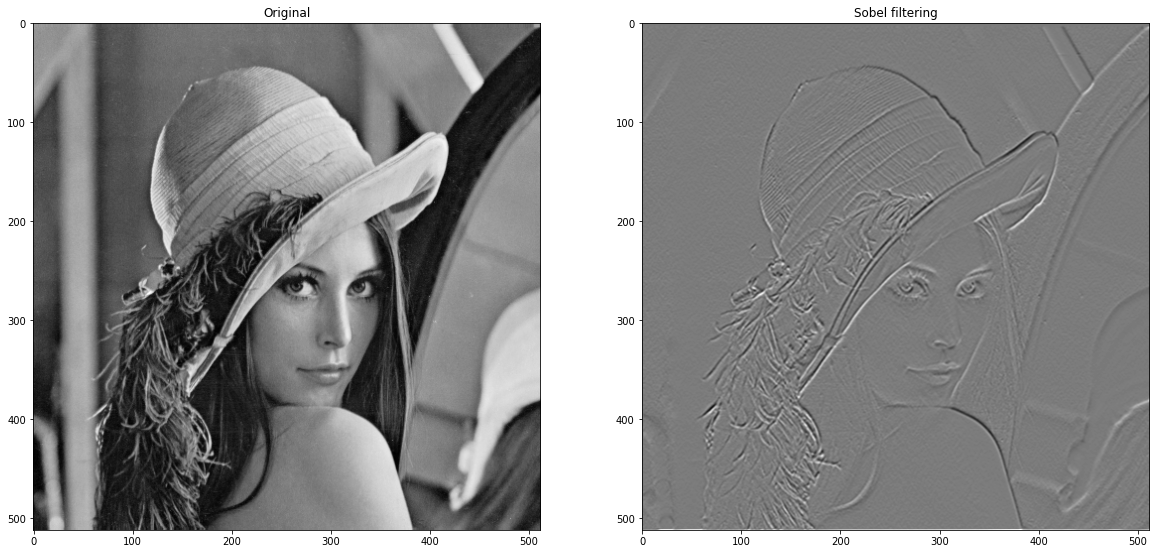

In [93]:
fig, axs = plt.subplots(1, len(names), figsize = (20, 20))

for i in range(len(conv_images)):
  axs[i].imshow(conv_images[i], cmap="gray")
  axs[i].title.set_text(names[i])

plt.show()

Using convolution with second order derivative to perform detail enhancement.

In [102]:
frac0, frac1 = 1, 1
plot_kernel = np.array([[0,1,0], 
                        [1,-4,1],
                        [0,1,0]])
kernel = (frac0/frac1)*plot_kernel
conv_kernel = np.flip(np.flip(kernel, 0), 1)

In [103]:
#@title Display kernel
from IPython.display import display, Markdown, Latex
if frac0/frac1 == 1:
  x = f"""Kernel = \\begin{{array}}{{|c|c|c|}}\\hline
          {plot_kernel[0][0]} & {plot_kernel[0][1]} & {plot_kernel[0][2]}  \\\\ \\hline
          {plot_kernel[1][0]} & {plot_kernel[1][1]} & {plot_kernel[1][2]}  \\\\ \\hline
          {plot_kernel[2][0]} & {plot_kernel[2][1]} & {plot_kernel[2][2]}   \\\\ \\hline
          \\end{{array}}"""
else:
  x = f"""Kernel = \\frac{{{frac0}}}{{{frac1}}}\\begin{{array}}{{|c|c|c|}}\\hline
          {plot_kernel[0][0]} & {plot_kernel[0][1]} & {plot_kernel[0][2]}  \\\\ \\hline
          {plot_kernel[1][0]} & {plot_kernel[1][1]} & {plot_kernel[1][2]}  \\\\ \\hline
          {plot_kernel[2][0]} & {plot_kernel[2][1]} & {plot_kernel[2][2]}   \\\\ \\hline
          \\end{{array}}"""
display(Latex(x))

<IPython.core.display.Latex object>

In [104]:
conv_image = correlate2d(image, conv_kernel.T, mode="same")
conv_image_norm = (conv_image-conv_image.mean())/(conv_image.std()) 

names = ["Original", "Laplacian filtering"]
conv_images = [image, conv_image_norm]

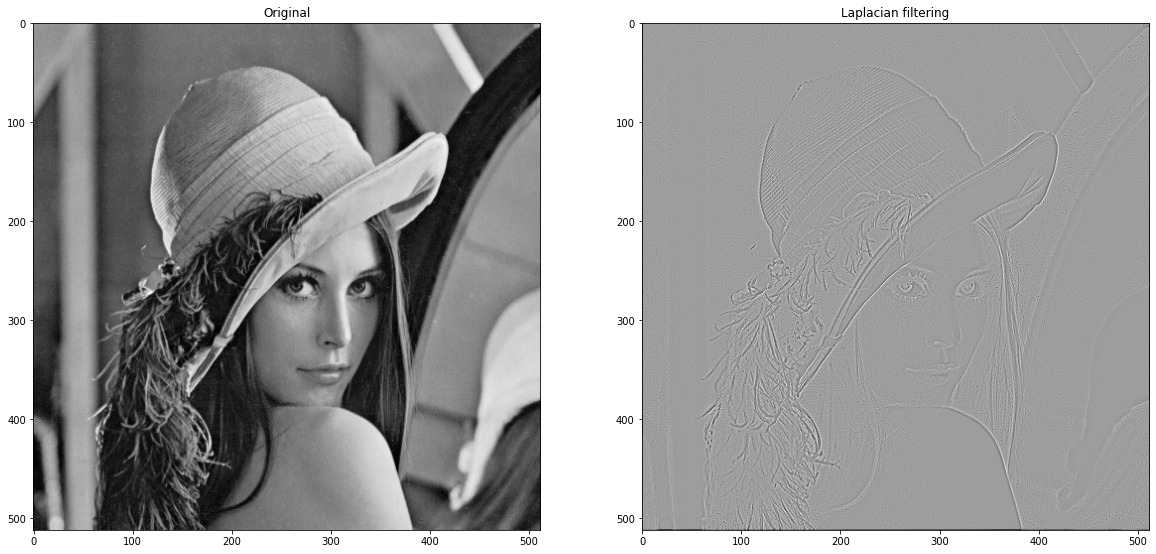

In [105]:
fig, axs = plt.subplots(1, len(names), figsize = (20, 20))

for i in range(len(conv_images)):
  axs[i].imshow(conv_images[i], cmap="gray")
  axs[i].title.set_text(names[i])

plt.show()

# **Unsharp masking and Highboost filtering**
Unsharp masking and  Highboost filtering are simple sharpening operator in signal and image processing. It is used for amplifying high frequency components of signals and images. The amplification is achieved via a procedure which subtracts a smoothed version of the media data from the original one.

Unsharp masking is when we perform image sharpening with multiplier constant 1.<br>
Highboost filtering is when we perform image sharpening with multiplier constant more than 1.

In [110]:
frac0, frac1 = 1, 9
plot_kernel = np.array([[1,1,1], 
                        [1,1,1],
                        [1,1,1]])
kernel = (frac0/frac1)*plot_kernel
conv_kernel = np.flip(np.flip(kernel, 0), 1)

In [111]:
#@title Display kernel
from IPython.display import display, Markdown, Latex
if frac0/frac1 == 1:
  x = f"""Kernel = \\begin{{array}}{{|c|c|c|}}\\hline
          {plot_kernel[0][0]} & {plot_kernel[0][1]} & {plot_kernel[0][2]}  \\\\ \\hline
          {plot_kernel[1][0]} & {plot_kernel[1][1]} & {plot_kernel[1][2]}  \\\\ \\hline
          {plot_kernel[2][0]} & {plot_kernel[2][1]} & {plot_kernel[2][2]}   \\\\ \\hline
          \\end{{array}}"""
else:
  x = f"""Kernel = \\frac{{{frac0}}}{{{frac1}}}\\begin{{array}}{{|c|c|c|}}\\hline
          {plot_kernel[0][0]} & {plot_kernel[0][1]} & {plot_kernel[0][2]}  \\\\ \\hline
          {plot_kernel[1][0]} & {plot_kernel[1][1]} & {plot_kernel[1][2]}  \\\\ \\hline
          {plot_kernel[2][0]} & {plot_kernel[2][1]} & {plot_kernel[2][2]}   \\\\ \\hline
          \\end{{array}}"""
display(Latex(x))

<IPython.core.display.Latex object>

In [138]:
n = 10
conv_image = correlate2d(image, conv_kernel, mode="same")
for _ in range(n-1):
  conv_image = correlate2d(conv_image, conv_kernel, mode="same")

unsharp_ori = (conv_image-conv_image.min())/(conv_image.max()-conv_image.min()) *255

names = ["Original", f"{n}xGaussian filtering"]
conv_images = [image, unsharp_ori]

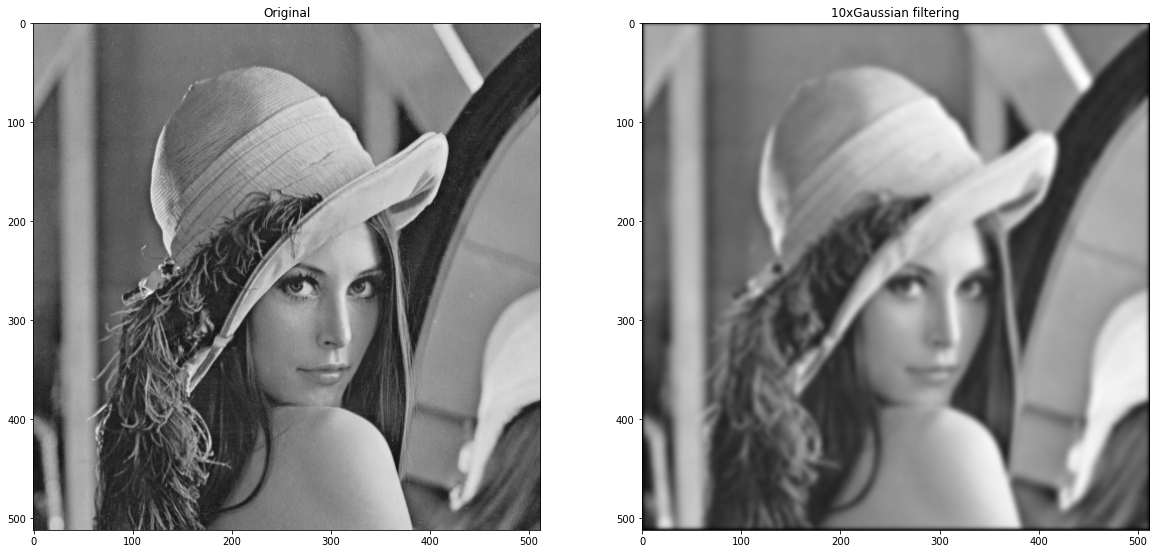

In [139]:
fig, axs = plt.subplots(1, len(names), figsize = (20, 20))

for i in range(len(conv_images)):
  axs[i].imshow(conv_images[i], cmap="gray", vmin=0,vmax=255)
  axs[i].title.set_text(names[i])

plt.show()

In [168]:
n = 10
conv_image = correlate2d(unsharp_ori, conv_kernel, mode="same")
for _ in range(n-1):
  conv_image = correlate2d(conv_image, conv_kernel, mode="same")

conv_image_norm = (conv_image-conv_image.min())/(conv_image.max()-conv_image.min()) *255

names = ["Original", f"{n}xGaussian filtering"]
conv_images = [unsharp_ori, conv_image_norm]

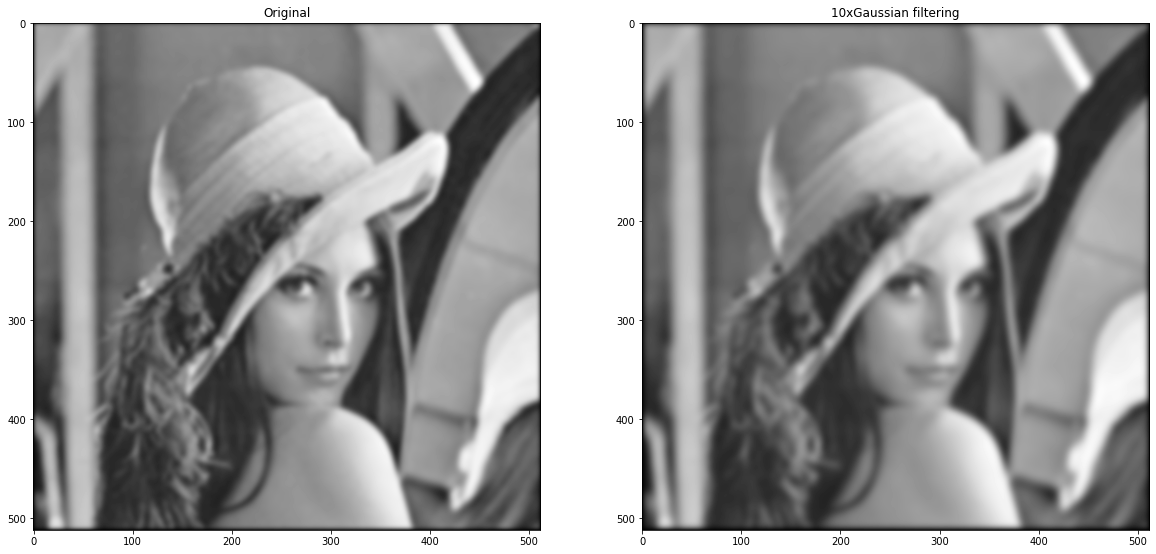

In [169]:
fig, axs = plt.subplots(1, len(names), figsize = (20, 20))

for i in range(len(conv_images)):
  axs[i].imshow(conv_images[i], cmap="gray", vmin=0,vmax=255)
  axs[i].title.set_text(names[i])

plt.show()

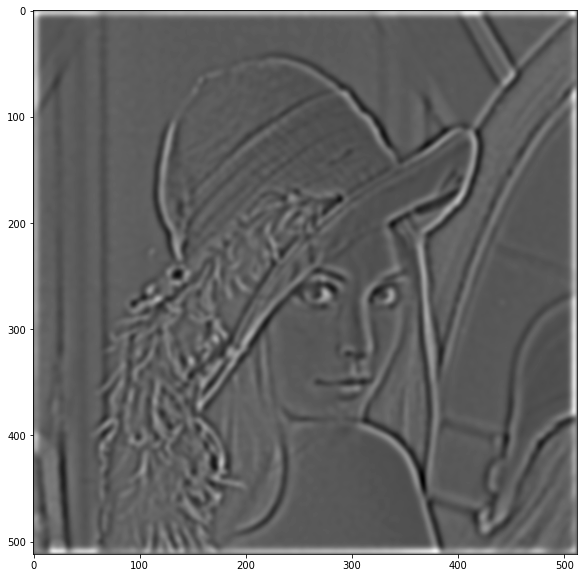

In [170]:
hf_image = unsharp_ori - conv_image_norm

plt.figure(figsize=(10, 10))
plt.imshow(hf_image, cmap="gray") #, vmin=0,vmax=255
plt.show()

In [171]:
k = 2
unsharp_result = addMinMax(unsharp_ori, hf_image)
highboost_result = addMinMax(unsharp_ori, k*hf_image)

names = ["Unsharp original", "Unsharp result", f"Highboost k={k} result"]
unsharp_images = [unsharp_ori, unsharp_result, highboost_result]

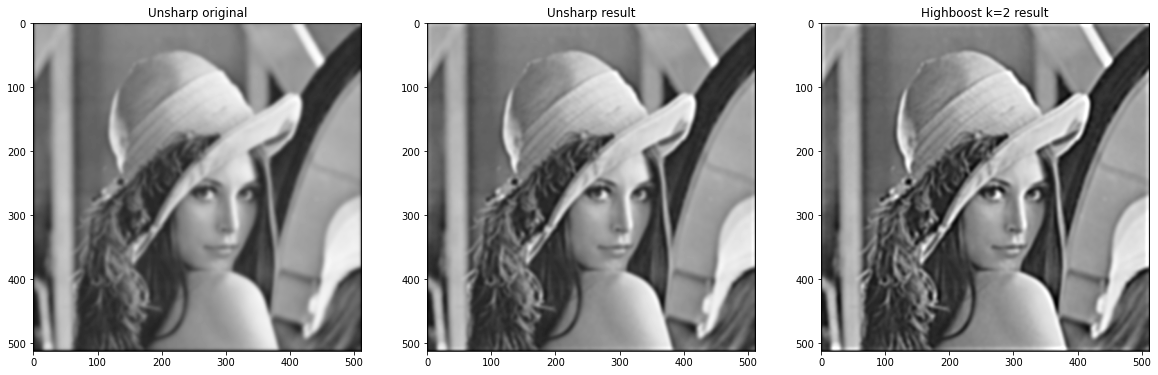

In [172]:
fig, axs = plt.subplots(1, len(names), figsize = (20, 20))

for i in range(len(unsharp_images)):
  axs[i].imshow(unsharp_images[i], cmap="gray", vmin=0,vmax=255)
  axs[i].title.set_text(names[i])

plt.show()